# Decision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_decision_tree, plot_feature_importances

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Decision tree score on train data: {:.2f} and test data {:.2f}'
      .format(clf.score(X_test, y_test), clf.score(X_test, y_test)))

Decision tree score on train data: 0.97 and test data 0.97


### Maximu decision depth

Decision tree score with max_dept of 1 on train data: 0.66 and test data 0.68
Decision tree score with max_dept of 2 on train data: 0.96 and test data 0.95
Decision tree score with max_dept of 3 on train data: 0.98 and test data 0.97
Decision tree score with max_dept of 4 on train data: 0.99 and test data 0.97
Decision tree score with max_dept of 5 on train data: 1.00 and test data 0.97
Decision tree score with max_dept of 6 on train data: 1.00 and test data 0.97
Decision tree score with max_dept of 7 on train data: 1.00 and test data 0.97
Decision tree score with max_dept of 8 on train data: 1.00 and test data 0.95
Decision tree score with max_dept of 9 on train data: 1.00 and test data 0.95


Text(0, 0.5, 'Score')

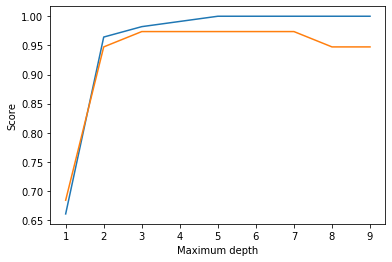

In [3]:
train_score = []
test_score = []
for dep in range(1, 10, 1):
    clf = DecisionTreeClassifier(max_depth=dep).fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))
    print('Decision tree score with max_dept of {:.0f} on train data: {:.2f} and test data {:.2f}'
          .format(dep, clf.score(X_train, y_train), clf.score(X_test, y_test)))
    
plt.plot(range(1, 10, 1), train_score, range(1, 10, 1), test_score)
plt.xlabel('Maximum depth')
plt.ylabel('Score')

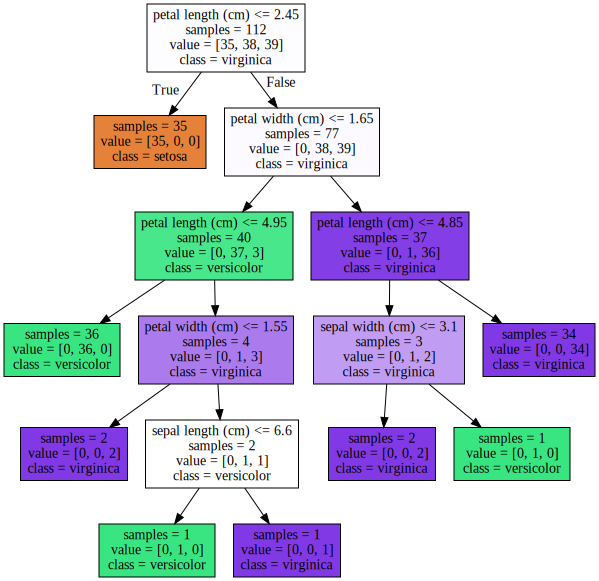

In [4]:
%matplotlib notebook
clf = DecisionTreeClassifier().fit(X_train, y_train)
plot_decision_tree(clf, iris.feature_names, iris.target_names)

### Feature importance is a key parameter to show us which feature is important in tree

<IPython.core.display.Javascript object>


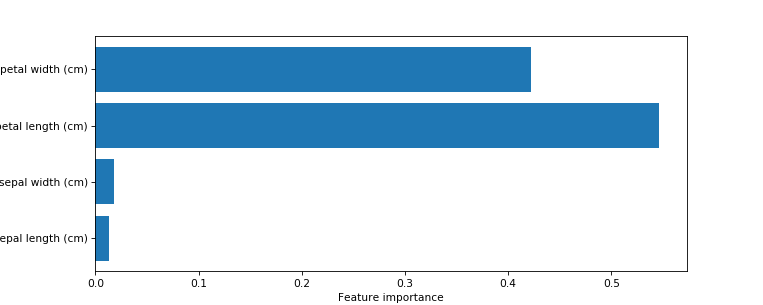

Feature importance: [0.01340675 0.01787567 0.54643762 0.42227996]


In [5]:
# For this part graphviz must be installed that takes a lot of time
plt.figure(figsize = (10,4), dpi = 70)
plot_feature_importances(clf, iris.feature_names)
# the feature importance can be shown as text like this:
print('Feature importance: {}'.format(clf.feature_importances_))

<IPython.core.display.Javascript object>


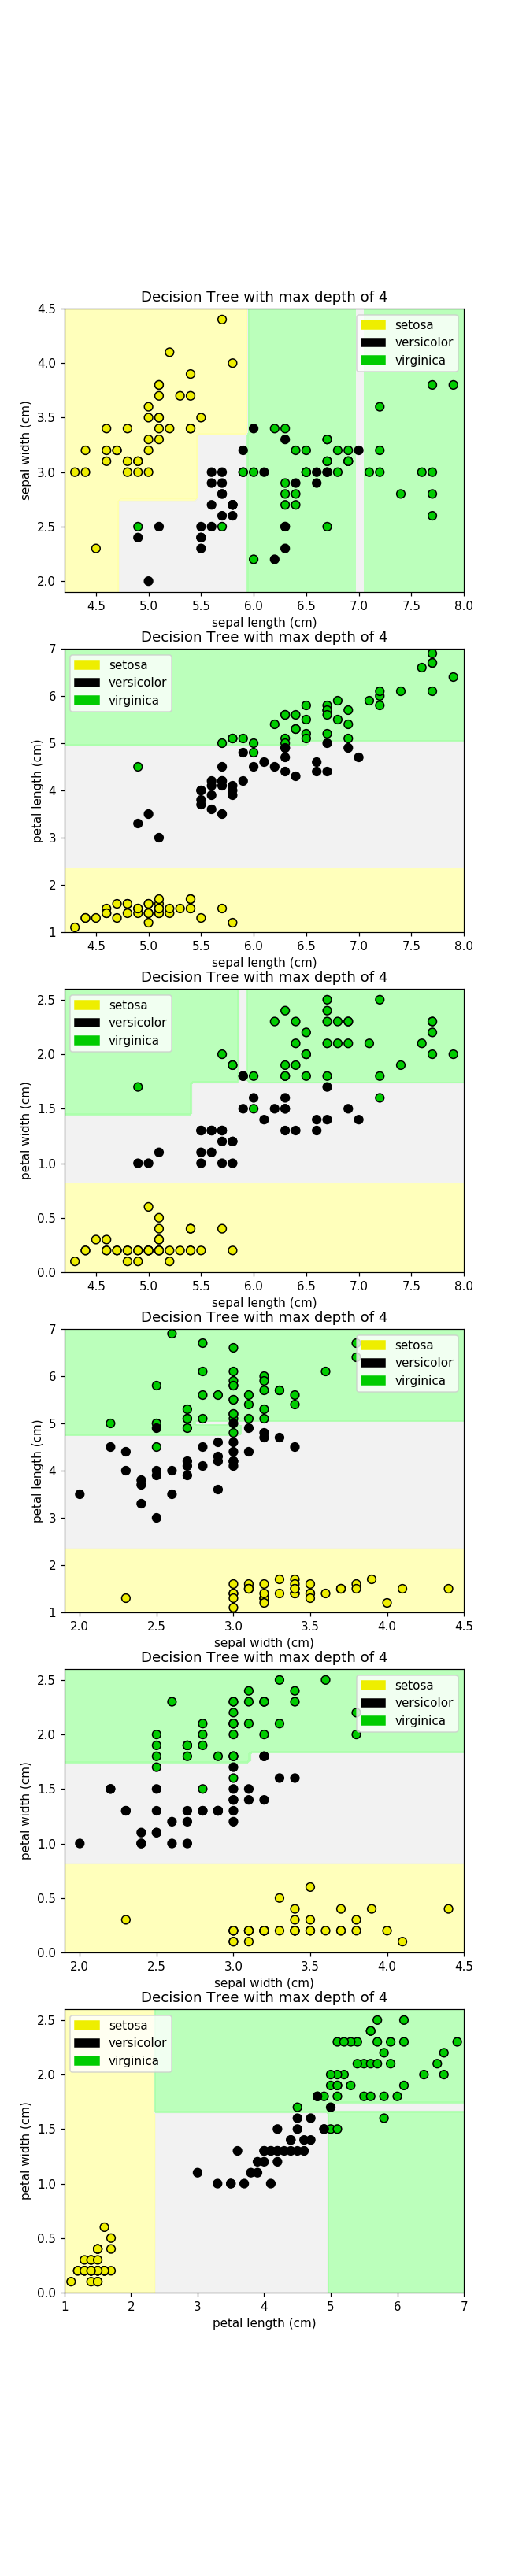

In [6]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize = (6,30))
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
max_depth = 4
for pair, subplot in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    clf = DecisionTreeClassifier(max_depth=4).fit(X,y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None, None, 'Decision Tree with max depth of 4', 
                                             subplot, iris.target_names)
    subplot.set_xlabel(iris.feature_names[pair[0]])
    subplot.set_ylabel(iris.feature_names[pair[1]])

In [7]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_feature_importances
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer)
maximum_depth = 6
clf = DecisionTreeClassifier(max_depth= maximum_depth, min_samples_leaf=8, random_state = 0).fit(X_train, y_train)


In [8]:
print('Decision tree score with max_dept of {:.0f} on train data: {:.2f} and test data {:.2f}'
          .format(maximum_depth, clf.score(X_train, y_train), clf.score(X_test, y_test)))

Decision tree score with max_dept of 6 on train data: 0.98 and test data 0.92


<IPython.core.display.Javascript object>


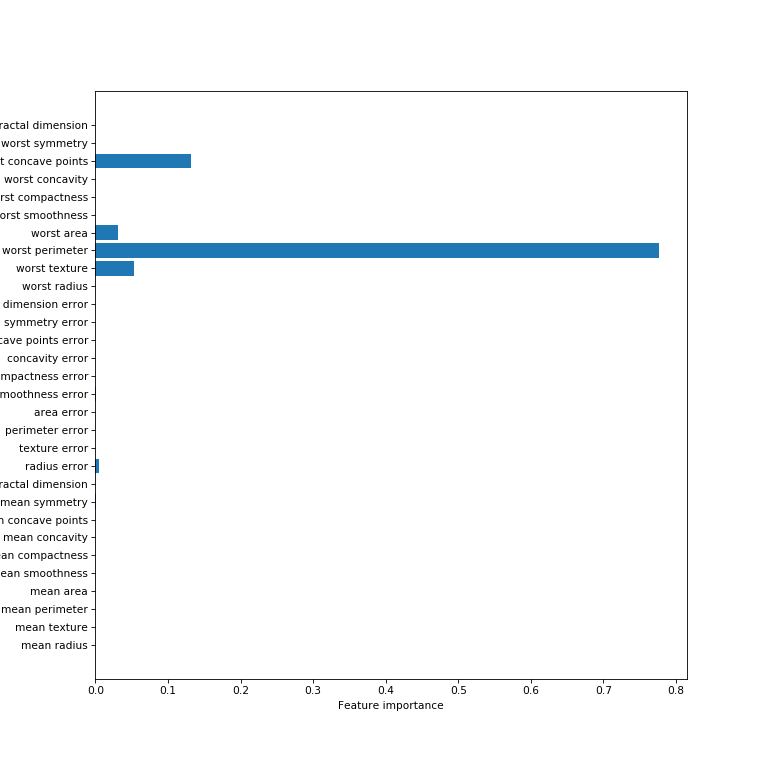

In [9]:
plt.figure(figsize = (10,10), dpi = 70)
plot_feature_importances(clf, cancer.feature_names)